# In this notebook we show how we can scrap data from webpages using the [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), a python library.
<br><br>

BEAUTIFULSOUP

In [2]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================


!pip install beautifulsoup4


In [3]:
# making the necessary imports
from pprint import pprint
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python" # specify the url

req = Request(myurl, headers={'User-Agent': 'Edge/16.16299'})

html = urlopen(req).read() # query the website so that it returns a html page
soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format

As the size of the HTML webpage (soupified) is large, we are just showing some of its output (only 2000 characters).

In [4]:
#pprint(soupified.prettify())      # for printing the full HTML structure of the webpage

In [5]:
pprint(soupified.prettify()[:2000]) # to get an idea of the html structure of the webpage

('<!DOCTYPE html>\n'
 '<html class="html__responsive" itemscope="" '
 'itemtype="https://schema.org/QAPage" lang="en">\n'
 ' <head>\n'
 '  <title>\n'
 '   datetime - How do I get the current time in Python? - Stack Overflow\n'
 '  </title>\n'
 '  <link '
 'href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" '
 'rel="shortcut icon"/>\n'
 '  <link '
 'href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" '
 'rel="apple-touch-icon"/>\n'
 '  <link '
 'href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" '
 'rel="image_src"/>\n'
 '  <link href="/opensearch.xml" rel="search" title="Stack Overflow" '
 'type="application/opensearchdescription+xml"/>\n'
 '  <link '
 'href="https://stackoverflow.com/questions/415511/how-do-i-get-the-current-time-in-python" '
 'rel="canonical">\n'
 '   <meta content="width=device-width, height=device-height, '
 'initial-scale=1.0, minimum-scale=1.0" name="view

In [6]:
soupified.title # to get the title of the web page

<title>datetime - How do I get the current time in Python? - Stack Overflow</title>

In [7]:
question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())

answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

Question: 
 How do I get the current time in Python?
Best answer: 
 Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.


IMAGES TESSERACT

In [8]:
!pip install pytesseract==0.3.7

In [9]:
import pytesseract
from pytesseract import image_to_string
from PIL import Image

try:
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    print("Not using colab")

Saving OpenSource.png to OpenSource (2).png


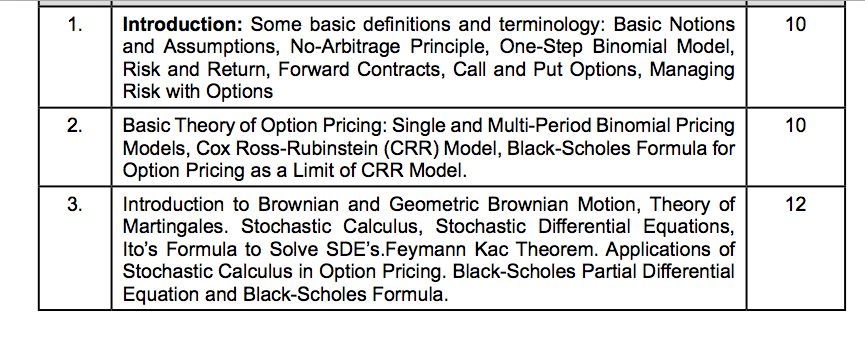

In [9]:
image1=Image.open('OpenSource.png')
image1

In [10]:
image_path=r"OpenSource.png"
extractedInformation = image_to_string(Image.open(image_path))
extractedInformation

'Introduction: Some basic definitions and terminology: Basic Notions\nand Assumptions, No-Arbitrage Principle, One-Step Binomial Model,\nRisk and Return, Forward Contracts, Call and Put Options, Managing\nRisk with Options\n\n \n\n10\n\n \n\nBasic Theory of Option Pricing: Single and Multi-Period Binomial Pricing\nModels, Cox Ross-Rubinstein (CRR) Model, Black-Scholes Formula for\nOption Pricing as a Limit of CRR Model.\n\n10\n\n \n\n \n\nIntroduction to Brownian and Geometric Brownian Motion, Theory of\nMartingales. Stochastic Calculus, Stochastic Differential Equations,\nIto’s Formula to Solve SDE’s.Feymann Kac Theorem. Applications of\nStochastic Calculus in Option Pricing. Black-Scholes Partial Differential\nEquation and Black-Scholes Formula.\n\n12\n\n \n\n \n\x0c'

TOKENIZATION

In [1]:
!pip install numpy==2.3.2

In [25]:
!pip install nltk==3.9.1
!pip install spacy==3.7.2

In [5]:
corpus_original = "Need to finalize the demo corpus which will be used for this notebook and it should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"
corpus = "Need to finalize the demo corpus which will be used for this notebook & should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"

In [6]:
corpus = corpus.lower()
print(corpus)

need to finalize the demo corpus which will be used for this notebook & should be done soon !!. it should be done by the ending of this month. but will it? this notebook has been run 4 times !!


In [7]:
import re
corpus = re.sub(r'\d+','', corpus)
print(corpus)

need to finalize the demo corpus which will be used for this notebook & should be done soon !!. it should be done by the ending of this month. but will it? this notebook has been run  times !!


In [8]:
import string
corpus = corpus.translate(str.maketrans('', '', string.punctuation))
print(corpus)

need to finalize the demo corpus which will be used for this notebook  should be done soon  it should be done by the ending of this month but will it this notebook has been run  times 


In [9]:
corpus = ' '.join([token for token in corpus.split()])
corpus

'need to finalize the demo corpus which will be used for this notebook should be done soon it should be done by the ending of this month but will it this notebook has been run times'

In [10]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
!pip install --upgrade nltk


In [23]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
from pprint import pprint
##NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stop_words_nltk = set(stopwords.words('english'))

tokenized_corpus_nltk = word_tokenize(corpus)
print("\nNLTK\nTokenized corpus:",tokenized_corpus_nltk)
tokenized_corpus_without_stopwords = [i for i in tokenized_corpus_nltk if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)


##SPACY
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
spacy_model = spacy.load('en_core_web_sm')

stopwords_spacy = spacy_model.Defaults.stop_words
print("\nSpacy:")
tokenized_corpus_spacy = word_tokenize(corpus)
print("Tokenized Corpus:",tokenized_corpus_spacy)
tokens_without_sw= [word for word in tokenized_corpus_spacy if not word in stopwords_spacy]

print("Tokenized corpus without stopwords",tokens_without_sw)


print("Difference between NLTK and spaCy output:\n",
      set(tokenized_corpus_without_stopwords)-set(tokens_without_sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



NLTK
Tokenized corpus: ['need', 'to', 'finalize', 'the', 'demo', 'corpus', 'which', 'will', 'be', 'used', 'for', 'this', 'notebook', 'should', 'be', 'done', 'soon', 'it', 'should', 'be', 'done', 'by', 'the', 'ending', 'of', 'this', 'month', 'but', 'will', 'it', 'this', 'notebook', 'has', 'been', 'run', 'times']
Tokenized corpus without stopwords: ['need', 'finalize', 'demo', 'corpus', 'used', 'notebook', 'done', 'soon', 'done', 'ending', 'month', 'notebook', 'run', 'times']

Spacy:
Tokenized Corpus: ['need', 'to', 'finalize', 'the', 'demo', 'corpus', 'which', 'will', 'be', 'used', 'for', 'this', 'notebook', 'should', 'be', 'done', 'soon', 'it', 'should', 'be', 'done', 'by', 'the', 'ending', 'of', 'this', 'month', 'but', 'will', 'it', 'this', 'notebook', 'has', 'been', 'run', 'times']
Tokenized corpus without stopwords ['need', 'finalize', 'demo', 'corpus', 'notebook', 'soon', 'ending', 'month', 'notebook', 'run', 'times']
Difference between NLTK and spaCy output:
 {'done', 'used'}


In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()

print("Before Stemming:")
print(corpus)

print("After Stemming:")
for word in tokenized_corpus_nltk:
    print(stemmer.stem(word),end=" ")

Before Stemming:
need to finalize the demo corpus which will be used for this notebook should be done soon it should be done by the ending of this month but will it this notebook has been run times
After Stemming:
need to final the demo corpu which will be use for thi notebook should be done soon it should be done by the end of thi month but will it thi notebook ha been run time 

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') # Download the missing resource
lemmatizer=WordNetLemmatizer()

for word in tokenized_corpus_nltk:
    print(lemmatizer.lemmatize(word),end=" ")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


need to finalize the demo corpus which will be used for this notebook should be done soon it should be done by the ending of this month but will it this notebook ha been run time 

In [21]:
#POS tagging using spacy
print("POS Tagging using spacy:")
doc = spacy_model(corpus_original)
# Token and Tag
for token in doc:
    print(token,":", token.pos_)

#pos tagging using nltk
nltk.download('averaged_perceptron_tagger')
print("POS Tagging using NLTK:")
pprint(nltk.pos_tag(word_tokenize(corpus_original)))

POS Tagging using spacy:
Need : VERB
to : PART
finalize : VERB
the : DET
demo : NOUN
corpus : NOUN
which : PRON
will : AUX
be : AUX
used : VERB
for : ADP
this : DET
notebook : NOUN
and : CCONJ
it : PRON
should : AUX
be : AUX
done : VERB
soon : ADV
! : PUNCT
! : PUNCT
. : PUNCT
It : PRON
should : AUX
be : AUX
done : VERB
by : ADP
the : DET
ending : NOUN
of : ADP
this : DET
month : NOUN
. : PUNCT
But : CCONJ
will : AUX
it : PRON
? : PUNCT
This : DET
notebook : NOUN
has : AUX
been : AUX
run : VERB
4 : NUM
times : NOUN
! : PUNCT
! : PUNCT
POS Tagging using NLTK:
[('Need', 'NN'),
 ('to', 'TO'),
 ('finalize', 'VB'),
 ('the', 'DT'),
 ('demo', 'NN'),
 ('corpus', 'NN'),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('used', 'VBN'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('notebook', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('soon', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('.', '.'),
 ('It', 'PRP'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


BeautifulSoup is one of the many libraries which allow us to scrape web pages. Depending on your needs you can choose between the many available choices like beautifulsoup, scrapy, selenium, etc